In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#
from scipy.integrate import simps
from scipy.integrate import odeint

In [2]:
# simps
y = np.arange(-9,10)
print(y)
print(simps(y))
x = np.arange(y.size)
print(x)
print(simps(y,x))

x = x ** 2
print(x)
print(simps(x,y))

[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9]
0.0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
0.0
[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324]
1944.0


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[[ 0.        ]
 [ 0.50000001]
 [ 2.00000001]
 [ 4.50000001]
 [ 8.00000001]
 [12.50000001]
 [18.00000001]
 [24.50000001]
 [32.00000001]
 [40.50000001]]


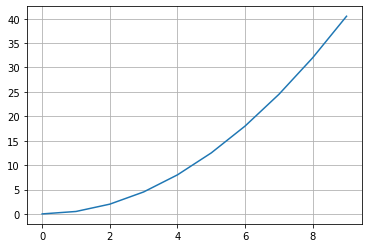

In [3]:
def diff(y, x):
    # 在 odeint 里面体现的就是 dy/dx = x
    return np.array(x)

x = np.linspace(0, 9, 10)  # 给出 x 范围
print(x)
y = odeint(diff, 0, x)  # 设初值为 0 此时 y 为一个数组，元素为不同 x 对应的 y 值
# 也可以直接 y = odeint(lambda y, x: x, 0, x)
print(y)
plt.plot(x, y[:,0])  # y 数组）矩阵）的第一列，（因为维度相同，plt.plot(x,y)效果相同）
plt.grid()
plt.show()

In [4]:
def square(x):
    # 平方
    return x * x

def increment(x):
    # 增加 1
    return x + 1

def wrapper(x,f):
    # 函数嵌套
    print(f'Calling: {f.__name__}({x})')
    y = f(x)
    print(f'Result: {y}','\n')
    return y

result = wrapper(3, square)
result = wrapper(4, increment)

Calling: square(3)
Result: 9 

Calling: increment(4)
Result: 5 



In [5]:
def recovery(s, R0, n=101):

    if isinstance(s,np.ndarray):
        out = np.zeros(shape=s.size)
        for i in range(s.size):
            x = np.linspace(s[i], 1.0, n)
            # 用下面方法生成的 x 的个数虽然和上面的一样，但是上面的以 1.0 为最后一个数，下面的不是。这会导致结果的精度不对
            # x = np.arange(s[i], 1.0, (1.0-s[i])/n)
            out[i] = simps(1/(x*R0(x)),x)
    else:
        x = np.linspace(s, 1.0, n)
        out = simps(1/(x*R0(x)), x)
    return out

def print_recovery(s, R0, n=101):
    print(f'Calling: {recovery.__name__}({s,n})')
    y = recovery(s, R0, n)
    print(f'Result: {y}','\n')

def R0_1(s):
    return 4 + 0*s

def R0_2(s):
    return 4*(1-9*(1-s)*s**4)


s = 0.2
print_recovery(s, R0_1, n=101)
s = np.array([0.2,0.3,0.4])
print_recovery(s, R0_2, n=1001)

Calling: recovery((0.2, 101))
Result: 0.40235949932702725 

Calling: recovery((array([0.2, 0.3, 0.4]), 1001))
Result: [0.66912522 0.56496397 0.48604337] 



In [6]:
def newton(f,df,guss,epsilon,iterations):
        xn = guss
        for n in range(0,iterations):
            fxn = f(xn)
            if abs(fxn) < epsilon:
                return xn
            dfxn = df(xn)
            if dfxn==0:
                return None
            xn = xn - fxn/dfxn
        return None

def susceptible_final(R0, s_guess, iterations=30, n=101):

    f = lambda s: 1 - s - recovery(s, R0, n)
    Df = lambda s: 1/(s*R0(s)) - 1

    approx = newton(f,Df,s_guess,1e-15,iterations)
    return approx

def R0_3(s):
    return 4 + 0*s

susceptible_final(R0_3, 0.01)

0.019856516268401594

In [7]:
def infection_max(R0,s_guss,ds=1e-3,iteration=50):

    f = lambda s: s*R0(s) - 1
    df = lambda s: R0(s) + s*((R0(s+ds)-R0(s-ds))/(2*ds))

    approx = newton(f,df,s_guss,1e-15,iteration)
    i = 1 - approx - recovery(approx, R0, n=101)
    return approx, i

def R0_4(s):
    return 4 + 0*s

infection_max(R0_4,0.5)

(0.25, 0.40342640301079824)

In [8]:
# task 1

def SIRModel(t,R0,i0=1e-6):

    s0 = 1.0 - i0

    def diff(ini,t):
        s,i = ini
        return - R0(s,i,t) * s * i, R0(s,i,t) * s * i - i

    result = odeint(diff,y0=[s0,i0],t=t)
    return np.array(result[:,0]),np.array(result[:,1])


t = np.linspace(0,30,200)

def R0_5(s,i,t):
    return 4 + 0*s

s,i = SIRModel(t,R0_5)
print(s[-1])
print(i[-1])
# s[-1]

0.019827396052199974
-3.4673156822138685e-10


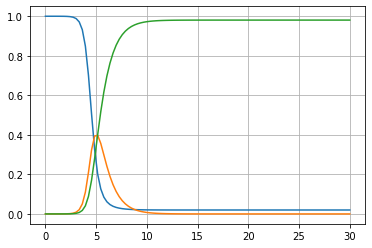

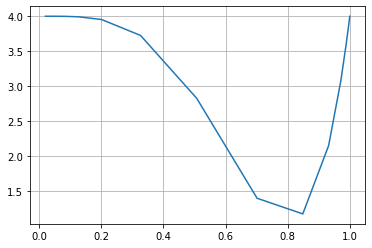

In [9]:
def multi_bump_R0(s,i):
    return 4*(1-9*(1-s)*s**4)
t = np.linspace(0,30,100)
s,i = SIRModel(t,R0_5)

r = recovery(s,R0_1,n=101)

plt.plot(t,s,label="s")
plt.plot(t,i,label="i")
plt.plot(t,r,label="t")
plt.grid()
plt.show()

plt.plot(s,multi_bump_R0(s,i))
plt.grid()
plt.show()



